In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel (r'C:\Users\HP\Desktop\FlightPricePredictionData.xlsx')
df.head()

,Unnamed: 0,Airline Name,Source,Destination,Route,Departure Time,Arrival Time,Duration,Total Stops,Price,Date Of Journey
0,0,SriLankan Airlines,BOM,LHR,BOM → CMB → LHR,03:10,20:00,21h 20m,1 stop,"₹64,734",30 Apr
1,1,Vistara,BOM,LHR,BOM → DEL → LHR,06:30,19:50,17h 50m,1 stop,"₹68,365",30 Apr
2,2,Vistara,BOM,LHR,BOM → DEL → LHR,08:45,19:50,15h 35m,1 stop,"₹68,770",30 Apr
3,3,Air India,BOM,LHR,BOM → IDR → DEL → LHR,07:05,19:00,16h 25m,2 stops,"₹69,655",30 Apr
4,4,Emirates,BOM,LGW,BOM → DXB → LGW,19:20,12:35,21h 45m,1 stop,"₹71,648",30 Apr


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2034 non-null   int64 
 1   Airline Name     2034 non-null   object
 2   Source           2034 non-null   object
 3   Destination      2034 non-null   object
 4   Route            2034 non-null   object
 5   Departure Time   2034 non-null   object
 6   Arrival Time     2034 non-null   object
 7   Duration         2034 non-null   object
 8   Total Stops      2034 non-null   object
 9   Price            2034 non-null   object
 10  Date Of Journey  2034 non-null   object
dtypes: int64(1), object(10)
memory usage: 174.9+ KB


In [4]:
df.drop({'Unnamed: 0','Departure Time','Arrival Time'},axis=1,inplace=True)

In [5]:
df['Price'] = df["Price"].str.replace("₹","")

In [6]:
df['Price'] = df["Price"].str.replace(",","")

In [7]:
df['Price'] = df['Price'].astype(int)

In [8]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline Name']=LE.fit_transform(df['Airline Name'])
df['Source']=LE.fit_transform(df['Source'])
df['Duration']=LE.fit_transform(df['Duration'])
df['Total Stops']=LE.fit_transform(df['Total Stops'])
df['Route']=LE.fit_transform(df['Route'])
df['Destination']=LE.fit_transform(df['Destination'])
df['Date Of Journey']=LE.fit_transform(df['Date Of Journey'])

In [9]:
df.head()

,Airline Name,Source,Destination,Route,Duration,Total Stops,Price,Date Of Journey
0,29,1,12,93,124,0,64734,10
1,35,1,12,111,85,0,68365,10
2,35,1,12,111,60,0,68770,10
3,2,1,12,176,69,1,69655,10
4,10,1,11,138,129,0,71648,10


In [10]:
df.describe()

,Airline Name,Source,Destination,Route,Duration,Total Stops,Price,Date Of Journey
count,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2.034000e+03,2034.000000
mean,17.313668,1.137168,7.683382,154.993609,159.133235,0.554081,1.014552e+05,4.069813
std,9.138167,0.418891,4.433589,77.135117,113.012531,0.989505,1.285709e+05,3.284366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.595000e+03,0.000000
25%,11.000000,1.000000,5.000000,102.000000,48.000000,0.000000,2.443600e+04,1.000000
50%,18.000000,1.000000,5.000000,140.000000,136.500000,0.000000,5.382950e+04,3.000000
75%,23.000000,1.000000,12.000000,220.000000,275.000000,1.000000,1.180515e+05,7.000000
max,36.000000,2.000000,20.000000,287.000000,331.000000,3.000000,1.405882e+06,10.000000


In [11]:
df.isnull().sum()

Airline Name       0
Source             0
Destination        0
Route              0
Duration           0
Total Stops        0
Price              0
Date Of Journey    0
dtype: int64

In [12]:
df.corr()

,Airline Name,Source,Destination,Route,Duration,Total Stops,Price,Date Of Journey
Airline Name,1.000000,-0.034504,0.072566,0.037366,-0.111805,-0.255482,0.168086,-0.033574
Source,-0.034504,1.000000,-0.198286,0.711930,-0.074720,-0.094448,-0.169308,-0.079900
Destination,0.072566,-0.198286,1.000000,-0.129059,-0.063666,-0.081083,0.379815,-0.107759
Route,0.037366,0.711930,-0.129059,1.000000,-0.048427,-0.026434,-0.057398,-0.074573
Duration,-0.111805,-0.074720,-0.063666,-0.048427,1.000000,0.343436,-0.041392,0.017248
Total Stops,-0.255482,-0.094448,-0.081083,-0.026434,0.343436,1.000000,-0.096950,0.036525
Price,0.168086,-0.169308,0.379815,-0.057398,-0.041392,-0.096950,1.000000,-0.049841
Date Of Journey,-0.033574,-0.079900,-0.107759,-0.074573,0.017248,0.036525,-0.049841,1.000000


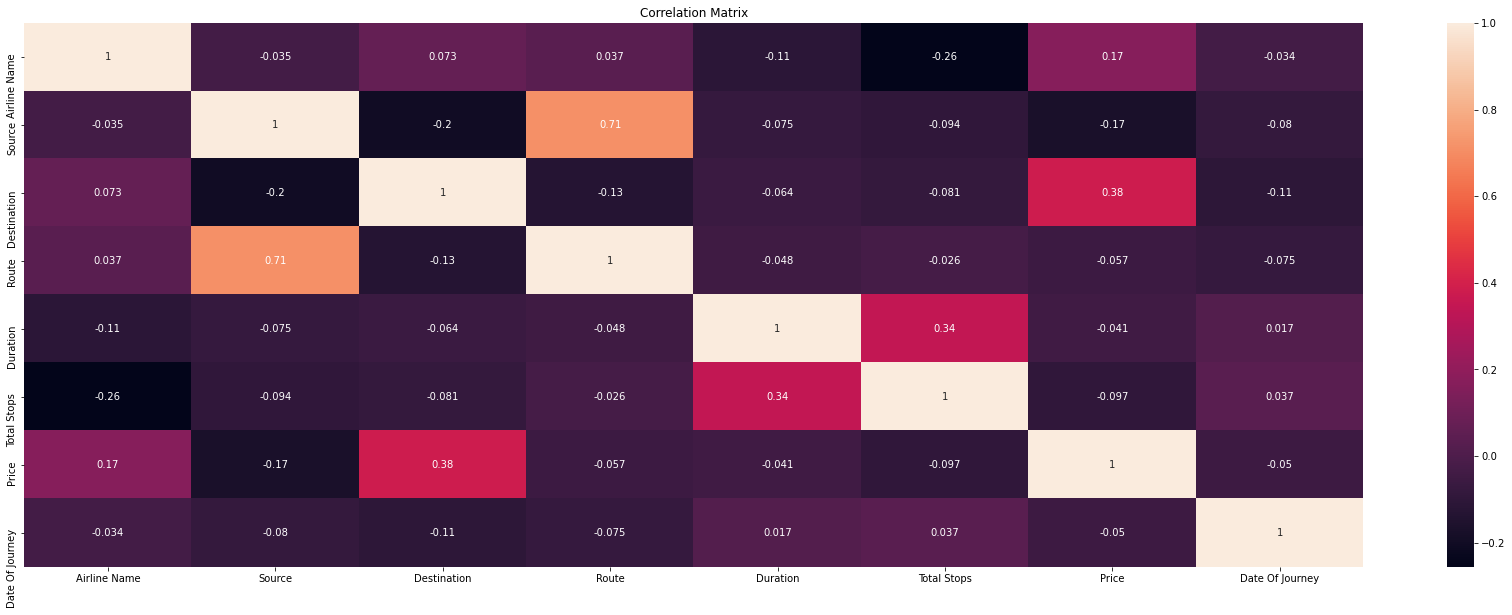

In [13]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[30,10])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

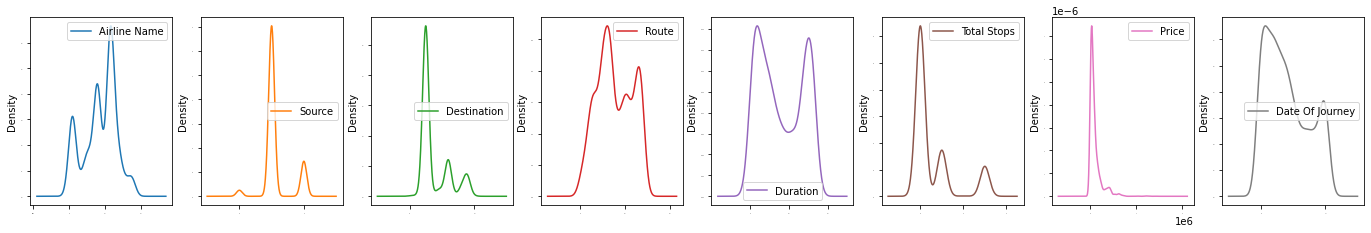

In [14]:
df.plot(kind='density',subplots=True,layout=(5,10),sharex=False,fontsize=1,figsize=(30,20))
plt.show()

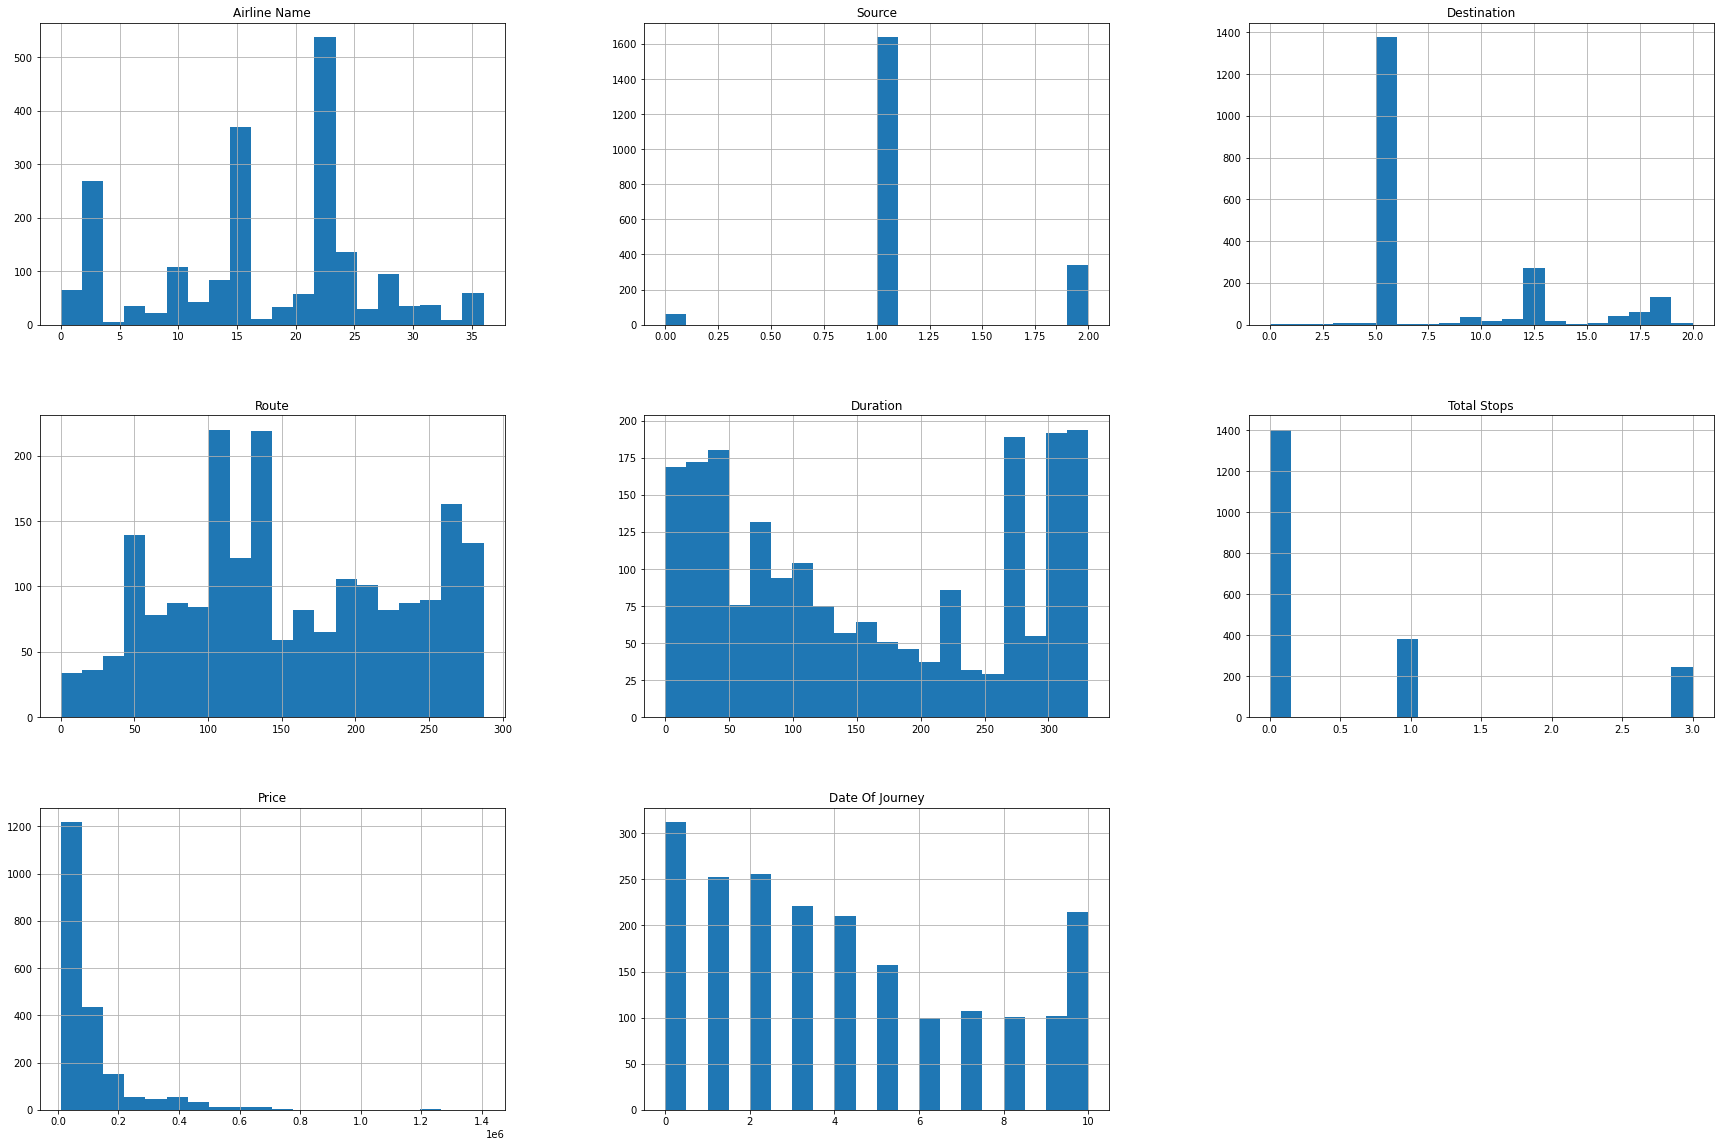

In [15]:
#plot histogram data vizualization
df.hist(bins=20,figsize=(30,20))
#plot showing
plt.show()

In [16]:
# Checking Skweness
df.skew().sort_values(ascending=False) # For descending

Price              3.193547
Total Stops        1.737148
Destination        1.275881
Source             0.850422
Date Of Journey    0.498061
Duration           0.164583
Route              0.073168
Airline Name      -0.359698
dtype: float64

In [17]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
df_new=power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)

In [18]:
df.skew().sort_values(ascending=False) # For descending

Total Stops        0.852765
Source             0.077189
Price              0.073348
Date Of Journey   -0.097290
Route             -0.163364
Duration          -0.264285
Destination       -0.265802
Airline Name      -0.358580
dtype: float64

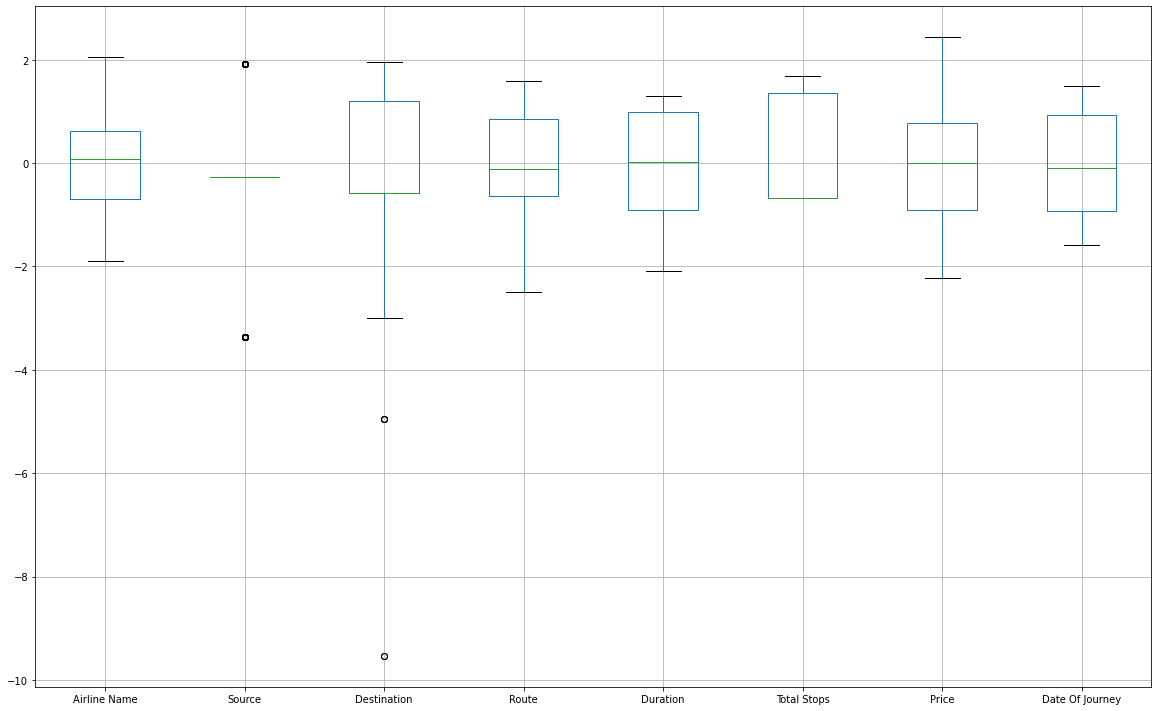

In [19]:
# Checking Outliers in data
# Plot boxplot
df.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [20]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [21]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [22]:
for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.2549018279810833
At Random State 0, the training accuracy is :- 0.24780393097678588


At Random State 1, the training accuracy is :- 0.24366678338893621
At Random State 1, the training accuracy is :- 0.28889178970710516


At Random State 2, the training accuracy is :- 0.23115640777572655
At Random State 2, the training accuracy is :- 0.34059559361479963


At Random State 3, the training accuracy is :- 0.24516631772023756
At Random State 3, the training accuracy is :- 0.2820543857042994


At Random State 4, the training accuracy is :- 0.25712767682265536
At Random State 4, the training accuracy is :- 0.23689033495001188


At Random State 5, the training accuracy is :- 0.2510593210455979
At Random State 5, the training accuracy is :- 0.26229432233433936


At Random State 6, the training accuracy is :- 0.24777678482352128
At Random State 6, the training accuracy is :- 0.27344475538773905


At Random State 7, the training accuracy is :- 0.24

In [23]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cv_score=cross_val_score(lr,x,y,cv=4)
    cv_mean=cv_score.mean()
    print(f'At cross fold {i} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  -1.4913060902449504 and accuracy score for training is 0.23047102647669837 and accuracy score for testing is 0.33719557803155153


At cross fold 3 the cv score is  -1.4913060902449504 and accuracy score for training is 0.23047102647669837 and accuracy score for testing is 0.33719557803155153


At cross fold 4 the cv score is  -1.4913060902449504 and accuracy score for training is 0.23047102647669837 and accuracy score for testing is 0.33719557803155153


At cross fold 5 the cv score is  -1.4913060902449504 and accuracy score for training is 0.23047102647669837 and accuracy score for testing is 0.33719557803155153


At cross fold 6 the cv score is  -1.4913060902449504 and accuracy score for training is 0.23047102647669837 and accuracy score for testing is 0.33719557803155153


At cross fold 7 the cv score is  -1.4913060902449504 and accuracy score for training is 0.23047102647669837 and accuracy score for testing is 0.33719557803155153




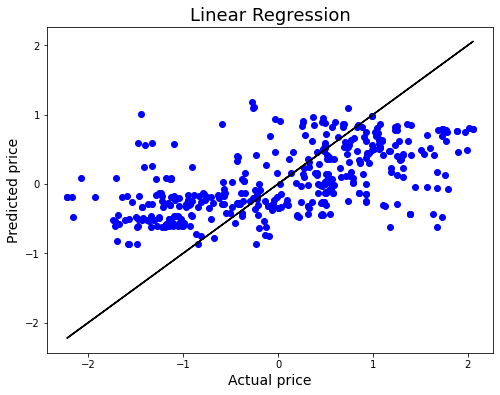

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='blue')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [25]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [26]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.3332053886892684

In [27]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-64.26608212373237

In [28]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.7049567125598493

In [29]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_1=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_1

,original,predicted
0,0.475972,0.503341
1,-0.377555,-0.463911
2,1.072749,0.533260
3,0.960727,0.439701
4,-1.099052,-0.465987
...,...,...
402,1.269392,0.622689
403,-0.990622,-0.565340
404,-0.060345,-0.370680
405,0.568091,0.077607


In [30]:
# Model Saving
import pickle
filename = 'Flight Price Prediction Data.pkl'
pickle.dump(lr,open(filename,'wb'))

# Thank You...!!!